In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)

import itertools as it
from collections import Counter, defaultdict, deque
from toolz.curried import *
from weather import TornadoEnv
from exact import solve

from agents import Agent, run_episode
from policies import LiederPolicy, FunctionPolicy

## Play around

In [106]:
from scipy.stats import beta
pd.DataFrame(beta([.1,2,10], [.1,2,10]).rvs((100, 3)))

,0,1,2
0,9.985741e-01,0.795526,0.582793
1,3.422402e-01,0.570833,0.565253
2,1.507943e-01,0.275983,0.621941
3,9.989179e-01,0.888075,0.347547
4,9.976370e-01,0.348866,0.380089
5,1.255786e-13,0.918626,0.474057
6,1.000000e+00,0.449521,0.334728
7,7.013258e-01,0.331447,0.468713
8,9.999962e-01,0.639464,0.480934
9,5.210878e-01,0.075661,0.430887


In [79]:
env = TornadoEnv(n_city=9, evac_cost=1, false_neg_cost=20, max_sims=20)
Q, V, pi, info = solve(env)
V(env.init)

KeyboardInterrupt: 

In [258]:
1/ (3 / 1000)

333.3333333333333

In [269]:
env = TornadoEnv(n_city=10, evac_cost=1, false_neg_cost=20, max_sims=100)
pol = LiederPolicy([0, 1, 1, 0, 1])
%time Agent(env, pol).run_episode()
# env.step(1)
# %time pol.act(env._state)
# env.step(6)
# %time pol.act(env._state)

CPU times: user 85.9 ms, sys: 6.43 ms, total: 92.4 ms
Wall time: 89.1 ms


{'actions': [0,
  0,
  1,
  1,
  2,
  2,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  7,
  7,
  8,
  8,
  9,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  0,
  2,
  3,
  4,
  5,
  8,
  0,
  2,
  3,
  4,
  5,
  8,
  0,
  2,
  3,
  4,
  5,
  8,
  0,
  2,
  3,
  4,
  5,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  0,
  2,
  3,
  4,
  5,
  8,
  8,
  0,
  2,
  3,
  4,
  10],
 'finished': True,
 'i_episode': 0,
 'return': -4.203888084716918,
 'rewards': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [ ]:
from policies import Policy
class NoMetareasonPolicy(Policy):
    """Distributes computations uniformly"""

    def act(self, state):
        if len(self.env.actions(state)) == 1:
            return self.env.term_action
        else:
            return min(range(len(state)), key=lambda i: sum(state[i]))
        
env2 = TornadoEnv(n_city=3, evac_cost=1, false_neg_cost=20, max_sims=60)
df2 = pd.DataFrame(Agent(env2, NoMetareasonPolicy()).run_many(5000))
df2['return'].mean()

## Things

In [5]:
pol = LiederPolicy([0, 1, 1, 0, 1])
trace = run_episode(pol, env)
print(trace['actions'])
sa = iter(zip(trace['states'], trace['actions']))

[0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 3]


In [6]:
df = pd.DataFrame(Agent(env, pol).run_many(1000))
df['return'].mean()

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

-1.1996665490714111

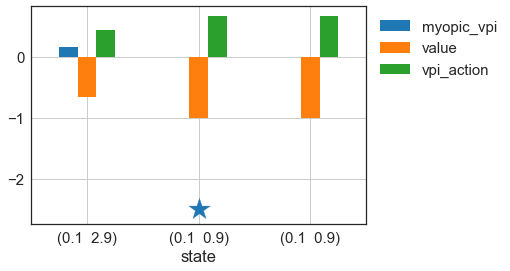

In [11]:
state, action = next(sa)
df = pd.DataFrame({
    'vpi_action': [env.vpi_action(state, a) for a in env._actions[:-1]],
    'myopic_vpi': [env.myopic_voc(state, a) for a in env._actions[:-1]],
    'value': [env.value(state, a) for a in env._actions[:-1]],
    'state': [f'({s[0]}  {s[1]})' for s in state]
}).set_index('state')
df.plot.bar(stacked=False, legend=False, rot=0)
plt.legend(bbox_to_anchor=(1,1))
plt.scatter([action], [-2.5], marker='*', s=500)
plt.grid()

## Load simulations

In [1]:
from glob import glob
df = pd.concat(map(pd.read_csv, glob('data/weather/sims/*')))

In [2]:
util = df.groupby(['n_city', 'name', 'max_sims'])['return'].mean()

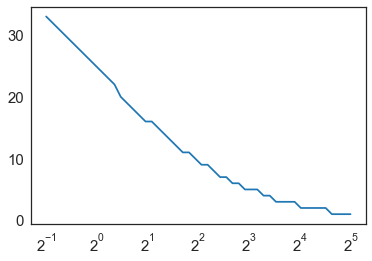

In [136]:
def n_sim(time, t_mr, t_sim):
    return np.floor(time / (t_mr + t_sim)).astype(int)

time = 50
t_sim = np.logspace(-1, 5, base=2)
plt.semilogx(t_sim, n_sim(time, 1, t_sim), basex=2)

In [137]:
t_sim = np.logspace(-11.5, -7, base=2)

In [138]:
t_lc = 0.001
def data():
    for time in [0.01, 0.03]:
        for nc in (10, 30):
            for name, t_mr in [('uniform', 0), ('LC', t_lc)]:
                d = util[nc, name][list(n_sim(time, t_mr, t_sim))].reset_index()
                d['time'] = time
                d['t_sim'] = t_sim
                d['n_city'] = nc
                d['name'] = name
                yield d

dd = pd.concat(data())
# sns.factorplot('t_sim', 'return', hue='name', data=dd, 
#                col='n_city', row='time', sharey='none')

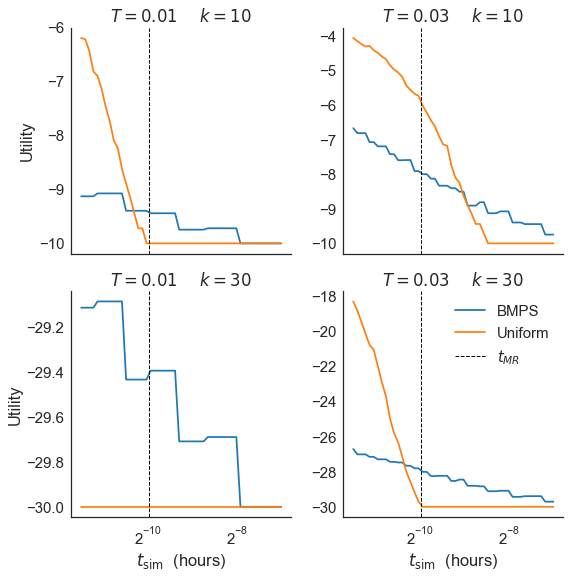

In [139]:
def plotter(data, **kwargs):
    for name, d in data.groupby('name'):
        n = {'LC': 'BMPS', 'uniform': 'Uniform'}[name]
        plt.semilogx('t_sim', 'return', data=d, label=n, basex=2)
    plt.axvline(t_lc, c='k', lw=1, ls='--', label='$t_{MR}$')
        
g = sns.FacetGrid(dd, row='n_city', col='time', size=4, sharey='none',)
g.map_dataframe(plotter)
g.set_xlabels('$t_{\mathrm{sim}}$  (hours)')
g.set_ylabels('Utility')
g.set_titles('$T = {col_name}$     $k = {row_name}$')
plt.legend()
plt.savefig('unrealistic.pdf')

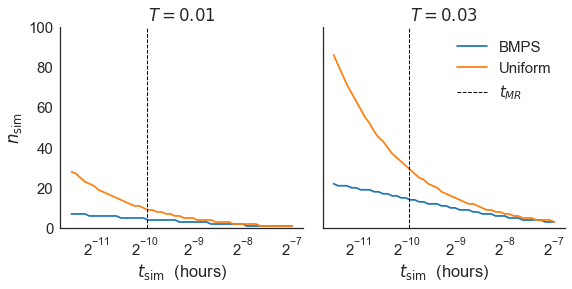

In [140]:
def plotter(data, **kwargs):
    for name, d in data.groupby('name'):
        n = {'LC': 'BMPS', 'uniform': 'Uniform'}[name]
        plt.semilogx('t_sim', 'max_sims', data=d, label=n, basex=2)
    plt.axvline(t_lc, c='k', lw=1, ls='--', label='$t_{MR}$')
    plt.ylim(0, 100)
        
g = sns.FacetGrid(dd.query('n_city==10'), col='time', size=4, sharey='all',)
g.map_dataframe(plotter)
g.set_xlabels('$t_{\mathrm{sim}}$  (hours)')
g.set_ylabels('$n_{\mathrm{sim}}$')
g.set_titles('$T = {col_name}$')
plt.legend()
plt.savefig('unrealistic-nsim.pdf')

## Realistic

In [129]:
t_lc = 0.001
t_sim = np.logspace(-1, 5, base=2)
def data():
    for time in [24]:
        for nc in (10, 30):
            for name, t_mr in [('uniform', 0), ('LC', t_lc)]:
                d = util[nc, name][list(n_sim(time, t_mr, t_sim))].reset_index()
                d['time'] = time
                d['t_sim'] = t_sim
                d['n_city'] = nc
                d['name'] = name
                yield d

dd = pd.concat(data())

/usr/local/lib/miniconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


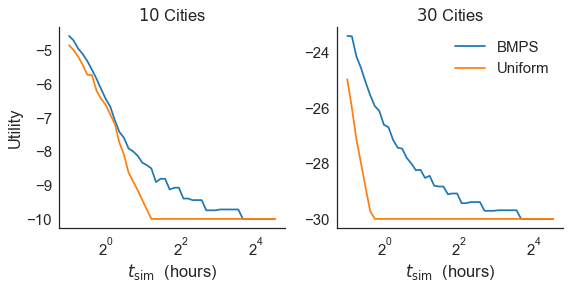

In [131]:
def plotter(data, **kwargs):
    for name, d in data.groupby('name'):
        n = {'LC': 'BMPS', 'uniform': 'Uniform'}[name]
        plt.semilogx('t_sim', 'return', data=d, label=n, basex=2)
        
g = sns.FacetGrid(dd, col='n_city', size=4, sharey='none')
g.map_dataframe(plotter)
g.set_xlabels('$t_{\mathrm{sim}}$  (hours)')
g.set_ylabels('Utility')
g.set_titles('${col_name}$ Cities')
plt.legend()
plt.savefig('tornado.pdf')

In [60]:
def data2(mrc=1):
    for time in (100):
        for t_sim in range(1, 10):
            d = util['uniform', n_sim(time, 0, t_sim)]
        d['time'] = time
        yield d
        for mrc in (0, 1):
            d = dd.loc['LC', time / (1+mrc)].reset_index()
            d['name'] = f'mr_cost = {mrc}'
            d['time'] = time
            yield d 
        
df2 = pd.concat(data2())
        

/usr/local/lib/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/usr/local/lib/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


## Scratch

In [60]:
dd = df.query('n_city > 10').set_index(['name', 'max_sims'])

def data3(mrc=1):
    for ns, sc in zip(n_sim, sim_cost):
        d = dd.loc['uniform', ns].reset_index()
        d['sim_cost'] = sc
        yield d
        for mrc in (0, 1):
            d = dd.loc['LC', time / (1+mrc)].reset_index()
            d['name'] = f'mr_cost = {mrc}'
            d['time'] = time
            yield d 
        
df3 = pd.concat(data3())
        

/usr/local/lib/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/usr/local/lib/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


In [70]:
df2

,name,max_sims,n_city,finished,i_episode,last,n_steps,return,time
0,uniform,10,15,True,0,"((0.1, 1.9), (0.1, 1.9), (0.1, 1.9), (0.1, 1.9...",11,-15.000000,10
1,uniform,10,15,True,1,"((0.1, 1.9), (1.1, 0.9), (0.1, 1.9), (0.1, 1.9...",11,-15.000000,10
2,uniform,10,15,True,2,"((0.1, 1.9), (0.1, 1.9), (0.1, 1.9), (0.1, 1.9...",11,-15.000000,10
3,uniform,10,15,True,3,"((0.1, 1.9), (0.1, 1.9), (0.1, 1.9), (0.1, 1.9...",11,-15.000000,10
4,uniform,10,15,True,4,"((1.1, 0.9), (0.1, 1.9), (0.1, 1.9), (0.1, 1.9...",11,-15.000000,10
5,uniform,10,15,True,5,"((0.1, 1.9), (0.1, 1.9), (0.1, 1.9), (0.1, 1.9...",11,-15.000000,10
6,uniform,10,15,True,6,"((0.1, 1.9), (0.1, 1.9), (1.1, 0.9), (0.1, 1.9...",11,-15.000000,10
7,uniform,10,15,True,7,"((0.1, 1.9), (0.1, 1.9), (0.1, 1.9), (0.1, 1.9...",11,-15.000000,10
8,uniform,10,15,True,8,"((0.1, 1.9), (0.1, 1.9), (0.1, 1.9), (0.1, 1.9...",11,-15.000000,10
9,uniform,10,15,True,9,"((0.1, 1.9), (0.1, 1.9), (0.1, 1.9), (0.1, 1.9...",11,-15.000000,10


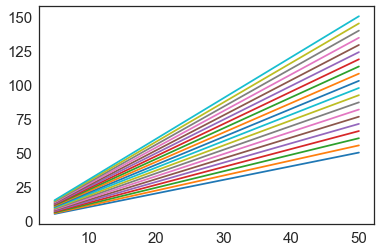

In [69]:
n_sim = np.arange(5, 51, 5)
sim_cost = np.linspace(0, 2, 20)
mr_cost = 1
time = (sim_cost + mr_cost) * n_sim[:, None]
plt.plot(n_sim, time);


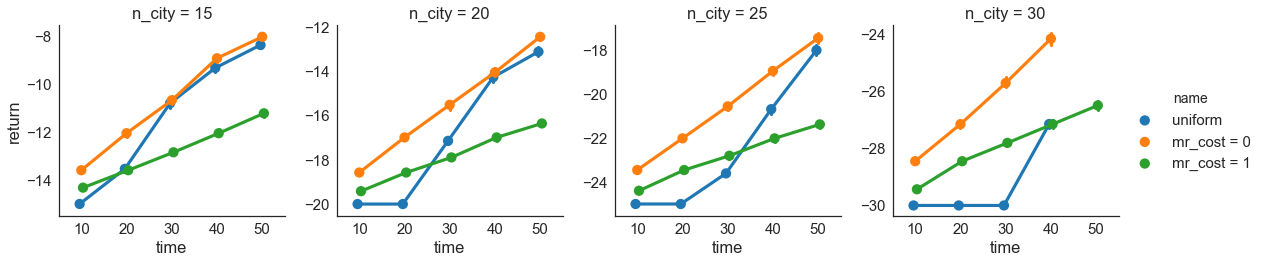

In [61]:
sns.factorplot('time', 'return', hue='name', col='n_city', sharey='none', 
               data=df2, n_boot=100, dodge=True)

In [38]:
meta.loc[5]

,n_city,name,finished,i_episode,last,n_steps,return
max_sims,,,,,,,
5,15,LC,True,0,"((0.1, 2.9), (0.1, 2.9), (0.1, 1.9), (0.1, 0.9...",6,-13.014896
5,15,LC,True,1,"((0.1, 2.9), (0.1, 2.9), (0.1, 1.9), (0.1, 0.9...",6,-13.097333
5,15,LC,True,2,"((0.1, 2.9), (1.1, 0.9), (0.1, 2.9), (0.1, 0.9...",6,-13.000024
5,15,LC,True,3,"((0.1, 2.9), (0.1, 2.9), (0.1, 1.9), (0.1, 0.9...",6,-13.001794
5,15,LC,True,4,"((0.1, 2.9), (0.1, 2.9), (0.1, 1.9), (0.1, 0.9...",6,-13.000574
5,15,LC,True,5,"((0.1, 2.9), (0.1, 2.9), (0.1, 1.9), (0.1, 0.9...",6,-13.227487
5,15,LC,True,6,"((0.1, 2.9), (1.1, 0.9), (0.1, 2.9), (0.1, 0.9...",6,-13.010521
5,15,LC,True,7,"((1.1, 1.9), (0.1, 2.9), (0.1, 1.9), (0.1, 0.9...",6,-14.000000
5,15,LC,True,8,"((0.1, 2.9), (0.1, 2.9), (1.1, 0.9), (0.1, 0.9...",6,-13.202442


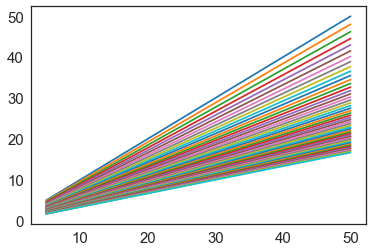

In [31]:
time = np.arange(5, 51, 5)
mrc = np.linspace(0, 2)
n_sims = time / (1 + mrc[:, None])
plt.plot(time, n_sims.T);

## Load policies

In [101]:
from os import listdir
import joblib
results = {}
policies = {}
for pkl in listdir('data/weather/opt_results'):
    n_city, max_sim = map(int, pkl.strip('.pkl').split('_'))
    results[n_city, max_sim] = res = joblib.load(f'data/weather/opt_results/{pkl}')
    policies[n_city, max_sim] = LiederPolicy([0, 1, res.x, 0, 1])
    
    
    

In [102]:
[k, r.]

{(3,
  5):      fun: 2.3380480829290375
    nfev: 5
     nit: 4
 success: True
    time: 19.746402896940708
       x: 47.639320073404214,
 (3,
  10):      fun: 1.6366307234788562
    nfev: 5
     nit: 4
 success: True
    time: 37.309174966067076
       x: 47.639320073404214,
 (3,
  15):      fun: 1.353848198886559
    nfev: 5
     nit: 4
 success: True
    time: 59.25918719731271
       x: 97.0820396156505,
 (3,
  20):      fun: 1.276557623482881
    nfev: 5
     nit: 4
 success: True
    time: 62.28087444789708
       x: 47.639320073404214,
 (3,
  25):      fun: 1.1973568590785135
    nfev: 5
     nit: 4
 success: True
    time: 66.45905236154795
       x: 47.639320073404214,
 (3,
  30):      fun: 1.1879183687416295
    nfev: 5
     nit: 4
 success: True
    time: 76.81088468618691
       x: 47.639320073404214,
 (3,
  35):      fun: 1.1625908337737094
    nfev: 5
     nit: 4
 success: True
    time: 92.56142745167017
       x: 47.639320073404214,
 (3,
  40):      fun: 1.1012048234761